# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, auc, roc_curve, classification_report


1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [12]:
#solution
cd = pd.read_csv('cleaned_data.csv')
cd


,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours,StudentId,NrSiblings,MathScore,ReadingScore,WritingScore,GenderE,LunchTypeE
0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,520645.0,3.0,71.0,71.0,74.0,1.0,1.0
1,2.0,5.0,1.0,1.0,2.0,1.0,2.0,0.0,303683.0,0.0,69.0,90.0,88.0,1.0,1.0
2,1.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,457351.0,4.0,87.0,93.0,91.0,1.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,812988.0,1.0,45.0,56.0,42.0,1.0,1.0
4,2.0,5.0,1.0,1.0,2.0,1.0,1.0,0.0,594678.0,0.0,76.0,78.0,75.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,3.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0,611241.0,2.0,59.0,61.0,65.0,1.0,1.0
29113,4.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,299810.0,1.0,58.0,53.0,51.0,1.0,1.0
29114,2.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,941589.0,1.0,61.0,70.0,67.0,1.0,1.0
29115,3.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,867225.0,3.0,82.0,90.0,93.0,1.0,1.0


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [13]:
#solution
bins = [-1, 49, 62, 74, 87, 100]
labels = [1, 2, 3, 4, 5]

cd['MathScoreGrade'] = pd.cut(cd['MathScore'], bins=bins, labels=labels, include_lowest=True)

print(cd['MathScoreGrade'].head())

0    3
1    3
2    4
3    1
4    4
Name: MathScoreGrade, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [19]:
#X (all features except MathScore, ReadingScore, WritingScore) and y (MathScore)
feature_cols = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours', 'NrSiblings', 'GenderE', 'LunchTypeE']
X = cd[feature_cols]
y = cd.MathScoreGrade


In [18]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

logistic = LogisticRegression()
logistic = logistic.fit(X_train, y_train)

y_pred=logistic.predict(X_test)

C:\Users\drinc\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
X.isna().sum(axis=0)

EthnicGroup            0
ParentEduc             0
TestPrep               0
ParentMaritalStatus    0
IsFirstChild           0
TransportMeans         0
WklyStudyHours         0
NrSiblings             0
GenderE                0
LunchTypeE             0
dtype: int64

4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

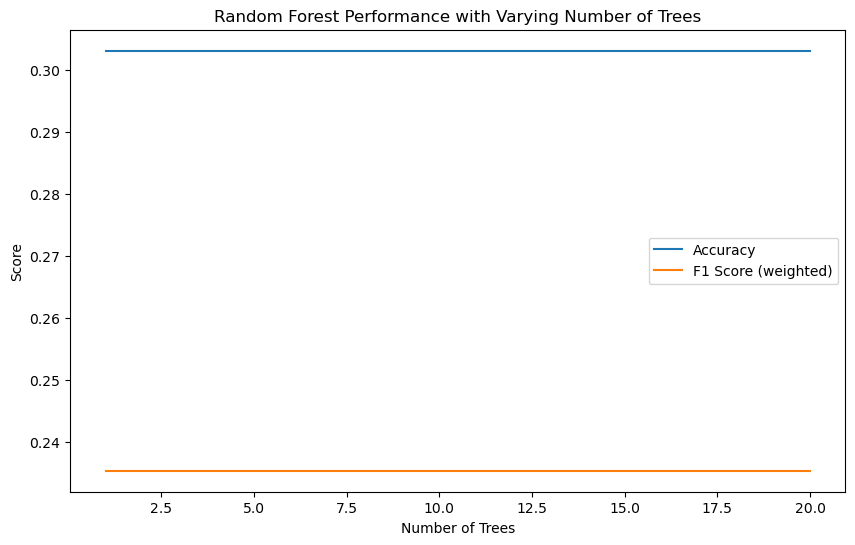

Confusion Matrix:
[[   0  236 3624  156    0]
 [   0  503 6325  565    0]
 [   0  537 7053  913    0]
 [   0  348 5105 1173    0]
 [   0  116 1709  754    0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4016
           2       0.29      0.07      0.11      7393
           3       0.30      0.83      0.44      8503
           4       0.33      0.18      0.23      6626
           5       0.00      0.00      0.00      2579

    accuracy                           0.30     29117
   macro avg       0.18      0.21      0.16     29117
weighted avg       0.23      0.30      0.21     29117



C:\Users\drinc\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\drinc\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\drinc\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
number_trees = [n for n in range(1, 21)]
accuracy_scores = []
f1_scores = []

for nt in number_trees:
    clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
    y_pred = cross_val_predict(clf, X, y, cv=5)

    accuracy_scores.append(accuracy_score(y, y_pred))
    f1_scores.append(f1_score(y, y_pred, average='weighted'))

plt.figure(figsize=(10, 6))
plt.plot(number_trees, accuracy_scores, label='Accuracy')
plt.plot(number_trees, f1_scores, label='F1 Score (weighted)')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Random Forest Performance with Varying Number of Trees')
plt.legend()
plt.show()

best_nt = number_trees[f1_scores.index(max(f1_scores))]

best_clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=best_nt)
best_clf.fit(X, y)

y_pred = best_clf.predict(X)

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y, y_pred)
print("Classification Report:")
print(classification_rep)

5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [29]:
#transform grades into failed (0) or passed (1)
conditions = [
    (cd['MathScore'] >= 0) & (cd['MathScore'] <= 49),  #failed
    (cd['MathScore'] >= 50) & (cd['MathScore'] <= 100)  #passed
]

values = ['failed', 'passed']
cd['MathScoreResult'] = np.select(conditions, values)

print(cd[['MathScore', 'MathScoreResult']])

       MathScore MathScoreResult
0           71.0          passed
1           69.0          passed
2           87.0          passed
3           45.0          failed
4           76.0          passed
...          ...             ...
29112       59.0          passed
29113       58.0          passed
29114       61.0          passed
29115       82.0          passed
29116       64.0          passed

[29117 rows x 2 columns]


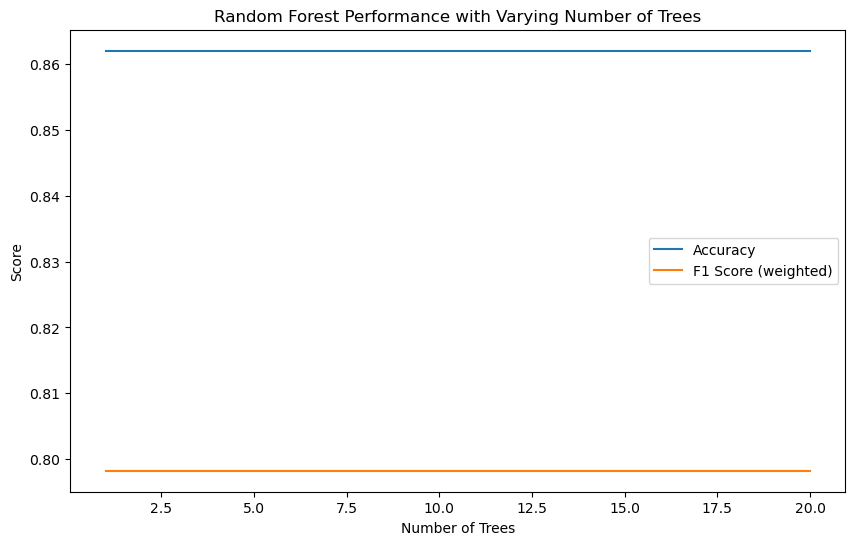

Confusion Matrix:
[[    5  4011]
 [   14 25087]]
Classification Report:
              precision    recall  f1-score   support

      failed       0.26      0.00      0.00      4016
      passed       0.86      1.00      0.93     25101

    accuracy                           0.86     29117
   macro avg       0.56      0.50      0.46     29117
weighted avg       0.78      0.86      0.80     29117



In [30]:
#Random Forest model 2
feature_cols = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours', 'NrSiblings', 'GenderE', 'LunchTypeE']
X = cd[feature_cols]
y = cd.MathScoreResult

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
logistic = LogisticRegression()
logistic = logistic.fit(X_train, y_train)
y_pred=logistic.predict(X_test)


number_trees = [n for n in range(1, 21)]
accuracy_scores = []
f1_scores = []

for nt in number_trees:
    clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
    y_pred = cross_val_predict(clf, X, y, cv=5)

    accuracy_scores.append(accuracy_score(y, y_pred))
    f1_scores.append(f1_score(y, y_pred, average='weighted'))

plt.figure(figsize=(10, 6))
plt.plot(number_trees, accuracy_scores, label='Accuracy')
plt.plot(number_trees, f1_scores, label='F1 Score (weighted)')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Random Forest Performance with Varying Number of Trees')
plt.legend()
plt.show()

best_nt = number_trees[f1_scores.index(max(f1_scores))]

best_clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=best_nt)
best_clf.fit(X, y)

y_pred = best_clf.predict(X)

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y, y_pred)
print("Classification Report:")
print(classification_rep)

6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.
Based on the results obtained from the analysis of two Random Forest models that differentiate the number of categories of the MathScore variable, we can observe that in the model with two categories (passed, failed), accuracy has significantly increased. This was expected, given that the second model is much more informative in the sense that it better meets the requirements of the confusion matrix.

However, despite the increase in accuracy, something noteworthy in the second model is its low precision and recall, and consequently, the F1 score. This implies that the model does not perform well in predicting whether someone will score 1 on the test, i.e., fail. Assuming that the distribution of results in the sample roughly corresponds to a normal distribution, I do not believe that the solution to this problem lies in another sample with more people receiving an unsatisfactory grade. However, testing the model on various samples to verify this assumption would certainly be beneficial.

What I am actually suggesting is oversampling the "failed" class, i.e., multiplying existing instances of the "failed" class to achieve a more balanced class ratio. Furthermore, considering that we have taken almost all variables from the database as predictors, I believe it would be good to explore their combination and select those that best predict MathScore, incorporating them into the model.